In [1]:
import numpy as np
import mkl_fft
from functools import partial
import copy

# add path to scatnet_python module
from path import PATH_TO_MODULE
import sys
sys.path.append(PATH_TO_MODULE)

from scatnet_python import *

import matplotlib.pylab as plt
%matplotlib inline 

# Units of frequency measure

#####  Frequency  (Hz)  and angular velocity (rad/sec) 

$$Hz = \frac{1}{sec}\ (\text{1 turn per second})$$

Frequency $f$ (measured in Hz) can be converted
to angular velocity $\omega$ (rad/sec) and vice versa 


**Hertz to radian/sec conversion**

$$1\ Hz = 2\pi\ rad/sec = 6.2831853\ rad/sec$$

$$\omega_{(rad/sec)} = 2 \pi f_{(Hz)}$$

**Radian/sec to hertz conversion**

$$1\ rad/sec = \frac{1}{2\pi}\ Hz = 0.1591549\ Hz $$

$$f_{(Hz)} = \frac{\omega_{(rad/sec)}}{2\pi}$$

Example (https://www.rapidtables.com/convert/frequency/hz-to-rad-s.html)



**Link between the number of sample points and frequency**

If we have a filter $f$ (in frequency domain), which is evaluated at $N$ points (that is filter is a function $f[n]$), then

To convert point_id to frequency use transform: $n \to w = \frac{2\pi}{N} n$

To convert frequency to point_id use transform: $w \to n = \frac{N}{2\pi}\ w$

##### Example of rad/sec to hertz  conversion (and vice versa)

In [5]:
radsec_to_hertz(values = [1])
radsec_to_hertz(values = [1], vice_versa=True)
radsec_to_hertz(values = np.power(2, np.arange(5, 13)))


 rad/sec to Hz
1 rad/sec ~ 0.32*pi + 2pi*0.0, = 0.16 Hz

 Hz to rad/sec
6.28 rad/sec ~ 0.0*pi + 2pi*1.0, = 1 Hz

 rad/sec to Hz
32 rad/sec ~ 0.19*pi + 2pi*5.0, = 5.09 Hz
64 rad/sec ~ 0.37*pi + 2pi*10.0, = 10.19 Hz
128 rad/sec ~ 0.74*pi + 2pi*20.0, = 20.37 Hz
256 rad/sec ~ 1.49*pi + 2pi*40.0, = 40.74 Hz
512 rad/sec ~ 0.97*pi + 2pi*81.0, = 81.49 Hz
1024 rad/sec ~ 1.95*pi + 2pi*162.0, = 162.97 Hz
2048 rad/sec ~ 1.9*pi + 2pi*325.0, = 325.95 Hz
4096 rad/sec ~ 1.8*pi + 2pi*651.0, = 651.9 Hz


# Gabor and morlet filters

$\psi(t)$ - filter in time domain, $\hat{\psi}(w)$ - filter in frequency domain (Fouier transform of $\psi(t)$)

**Real gabor filter**
$$\psi(t) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-t^2/2 \sigma^2}\cos(2\pi i f_c t) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-t^2/2 \sigma^2}\cos(w_c t),$$

$$\hat{\psi}(w) = \int_{\infty}^{\infty}\psi(t)e^{-iwt} dt = \frac{1}{2}(e^{-\sigma^2(w - w_c)^2/2} + e^{-\sigma^2(w + w_c)^2/2}) = 
\frac{1}{2}(e^{-2\pi^2\sigma^2(f - f_c)^2} + e^{-2\pi^2\sigma^2(f+ f_c)^2}) $$

**Complex gabor filter**
$$\psi(t) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-t^2/2 \sigma^2}e^{2\pi i f_c t} = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-t^2/2 \sigma^2}e^{iw_c t},$$

$$\hat{\psi}(w) = \int_{\infty}^{\infty}\psi(t)e^{-iwt} dt = e^{-\sigma^2(w - w_c)^2/2}  = 
e^{-2\pi^2\sigma^2(f - f_c)^2}$$

In frequency domain Gabor filter looks like Gaussian function with mean $f_c$ and standard deviation $\frac{}{}$

When standard deviation in time domain increases, standard deviation in frequency domain decreases and vice versa.

##### Example of gabor filters and theirs morletified versions (in frequency domain)

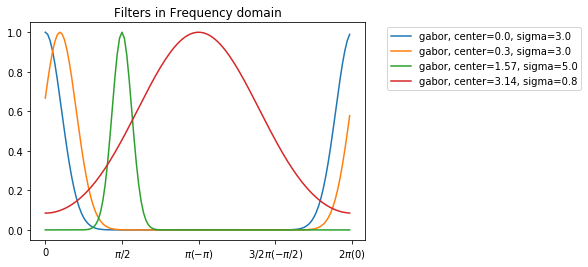

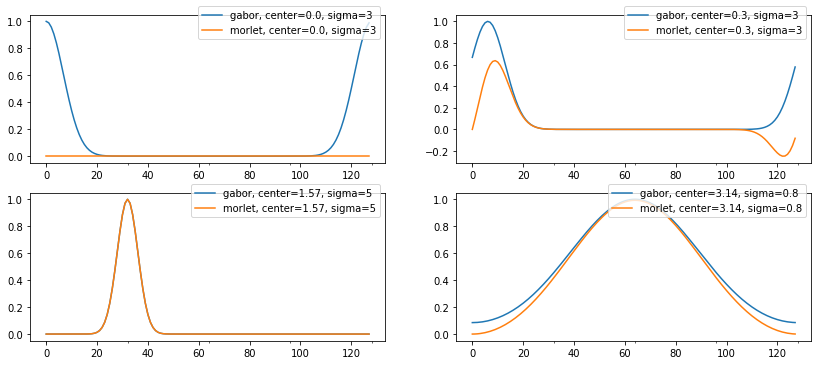

In [7]:
test_gabor_morletify()

# Filter downsampling in frequency domain


We need to downsample filter when we perform convolution in time domain ( = multiplication in frequency domain)  of the filter and shorter signal

##### Example of filter downsampling in frequency domain


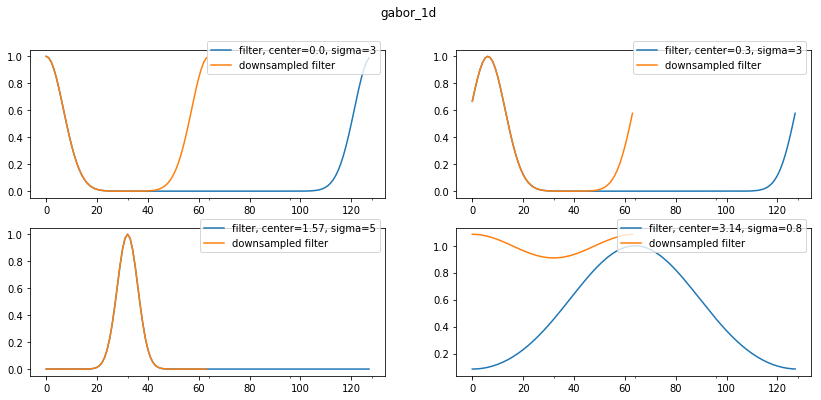

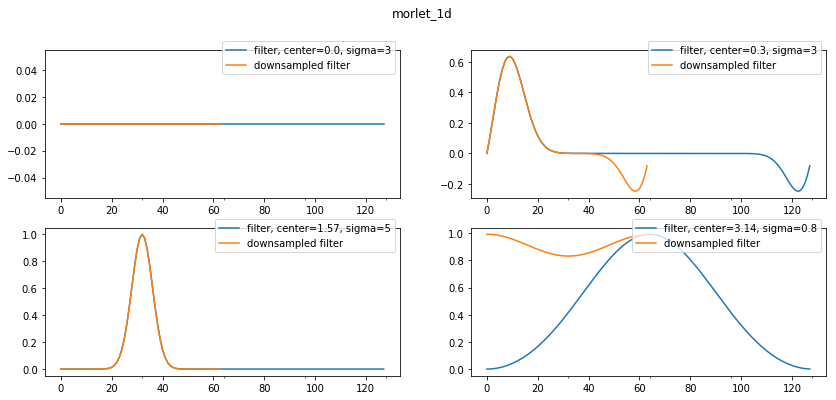

In [8]:
test_downsample_filter(N = 128, filter_type = 'gabor_1d', ds_factor=1)
test_downsample_filter(N = 128, filter_type = 'morlet_1d', ds_factor = 1)

# Filter bank

In [9]:
filt_opt_bank, bank = test_filter_bank(return_bank = True)

for k in range(len(bank)):
    print(vars(bank[k].meta))

{'B': 8, 'sigma_phi0': 6.9563662072526471, 'T': 1024, 'center_psi0': 3.0112229095168628, 'boundary': 'symm', 'P': 11, 'filter_size': 4096, 'sigma_psi0': 6.9563662072526471, 'sigma0': 1.1547005383792517, 'phi_bw_miltiplier': 1, 'precision': 'float64', 'J': 41, 'phi_dirac': 0, 'Q': 8, 'filter_type': 'morlet_1d'}
{'B': 1, 'sigma_phi0': 0.57735026918962584, 'T': 1024, 'center_psi0': 2.356194490192345, 'boundary': 'symm', 'P': 0, 'filter_size': 4096, 'sigma_psi0': 1.1547005383792517, 'sigma0': 1.1547005383792517, 'phi_bw_miltiplier': 2, 'precision': 'float64', 'J': 10, 'phi_dirac': 0, 'Q': 1, 'filter_type': 'morlet_1d'}


Bank  0


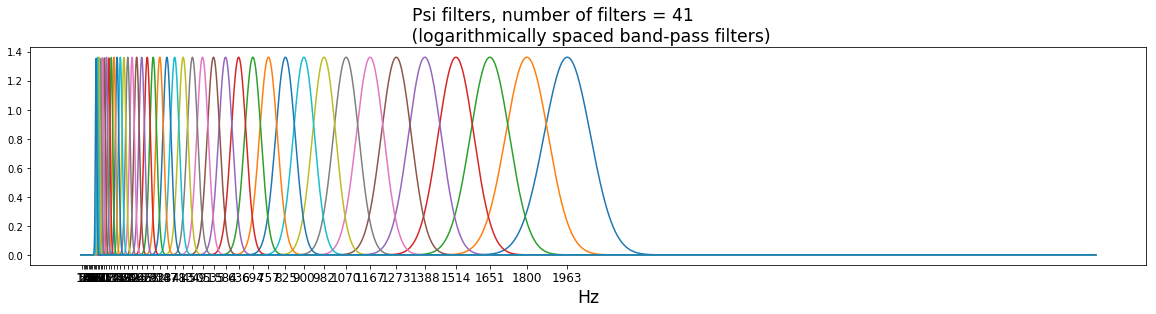

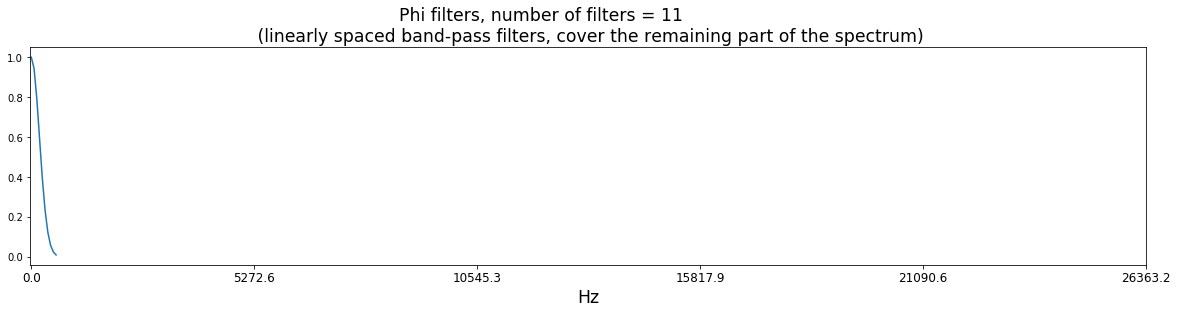

Bank  1


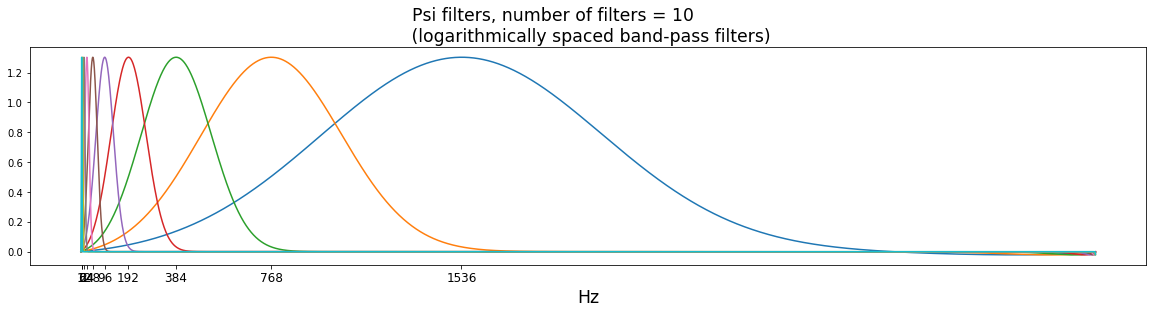

In [10]:
plot_filter_bank(bank, filt_opt_bank)

Bank 0
J = 41, P = 11


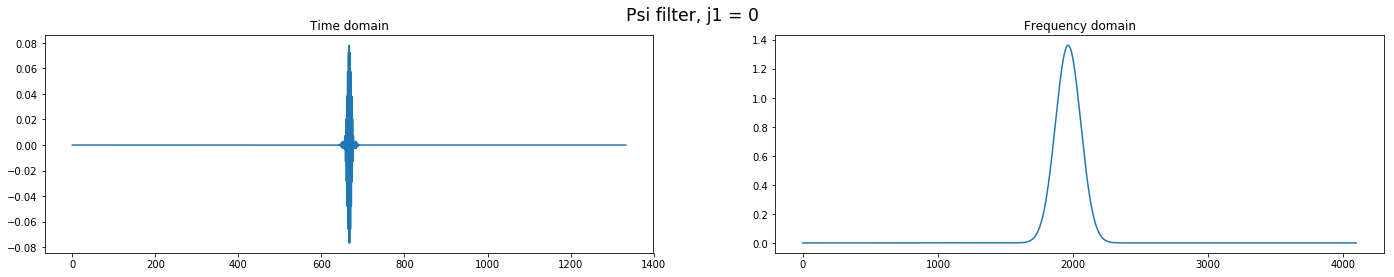

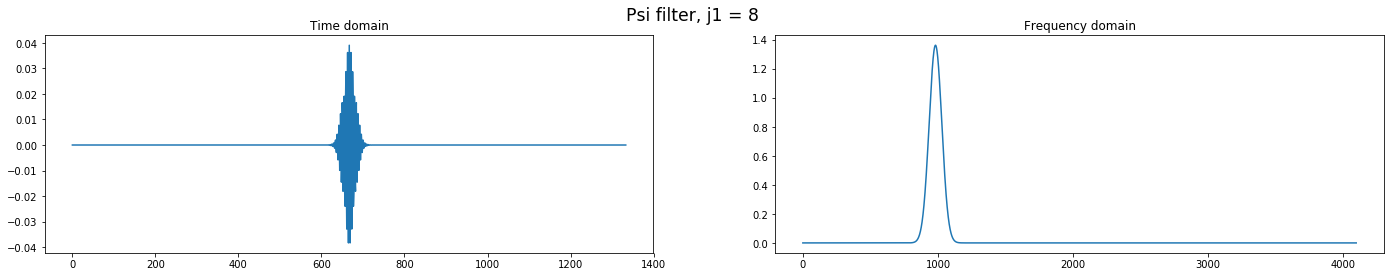

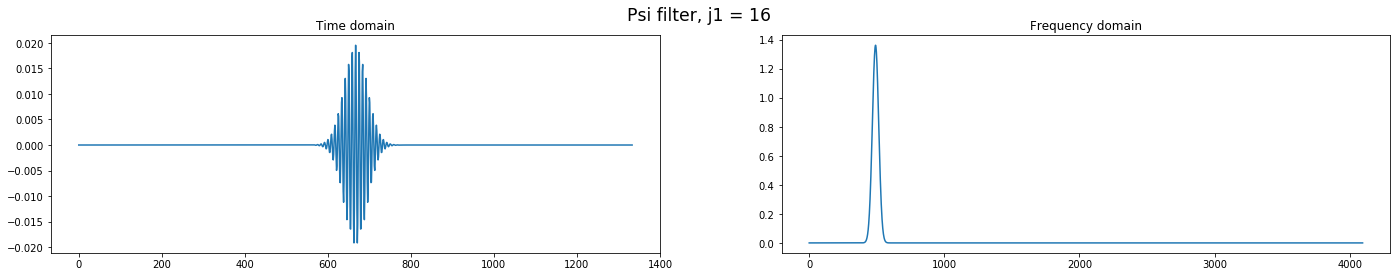

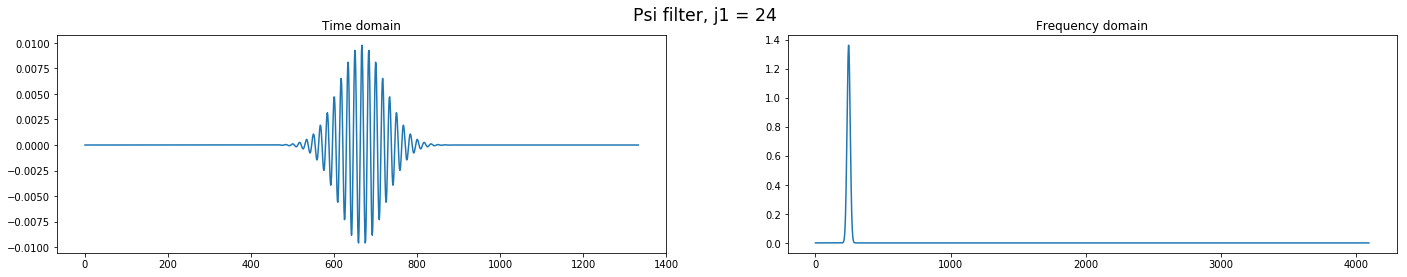

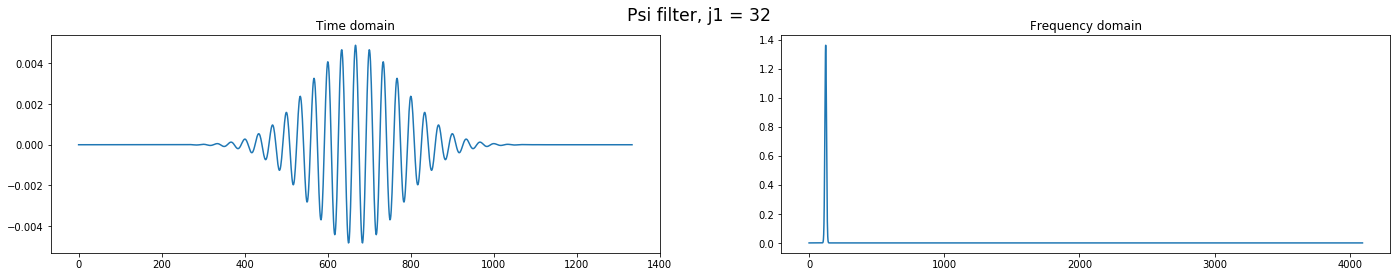

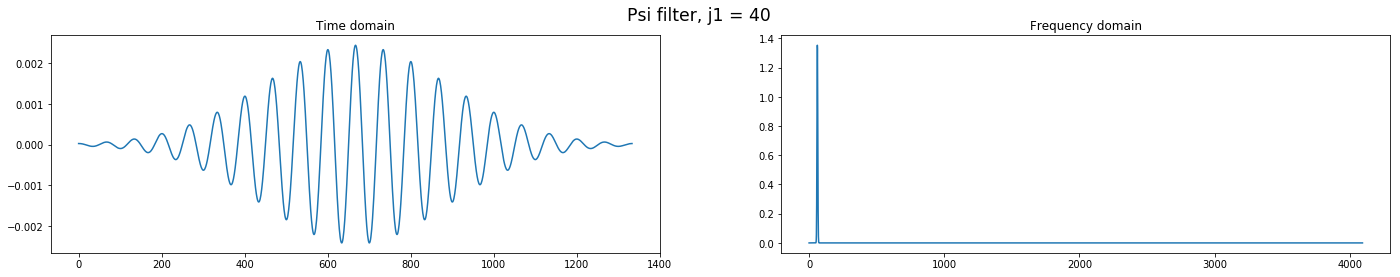

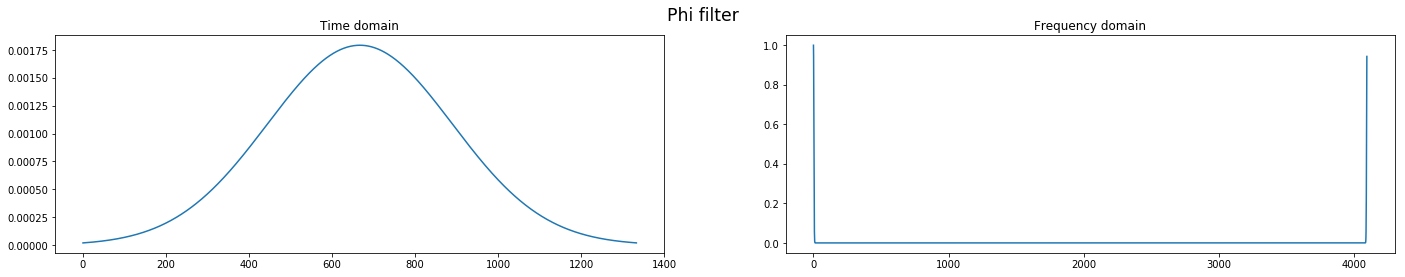

Bank 1
J = 10, P = 0


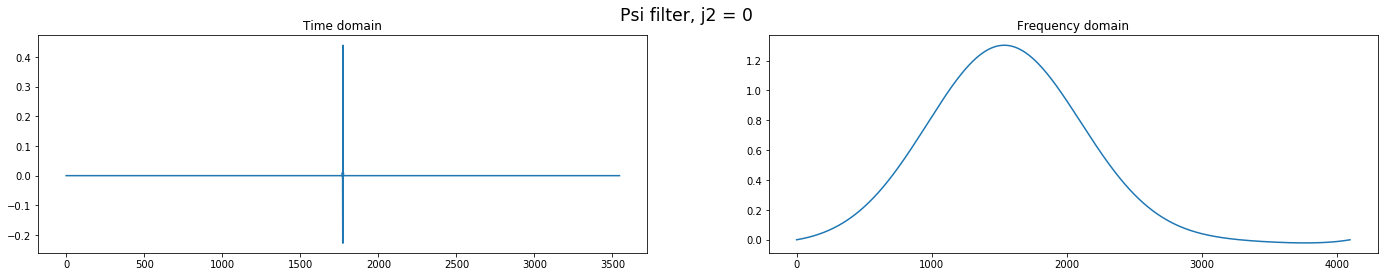

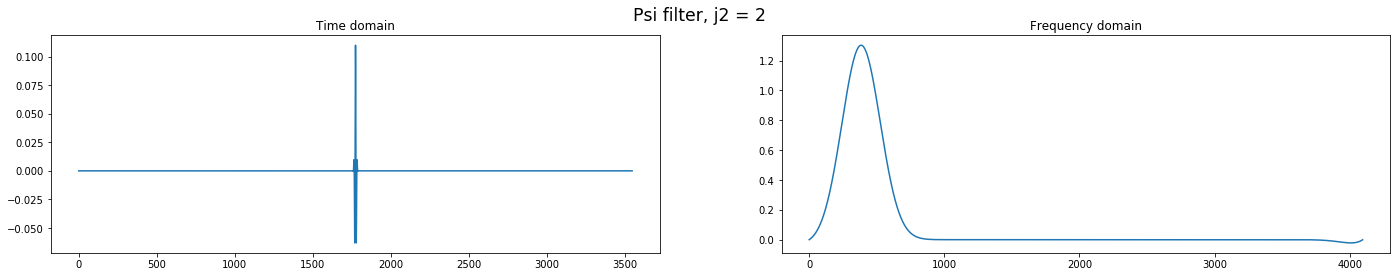

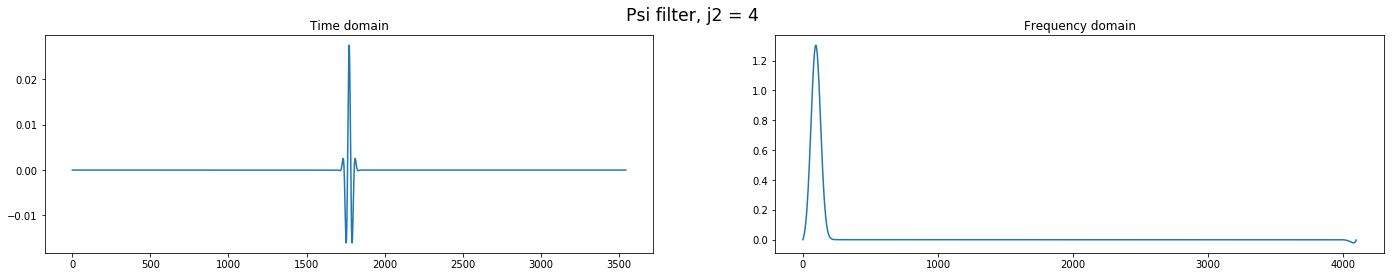

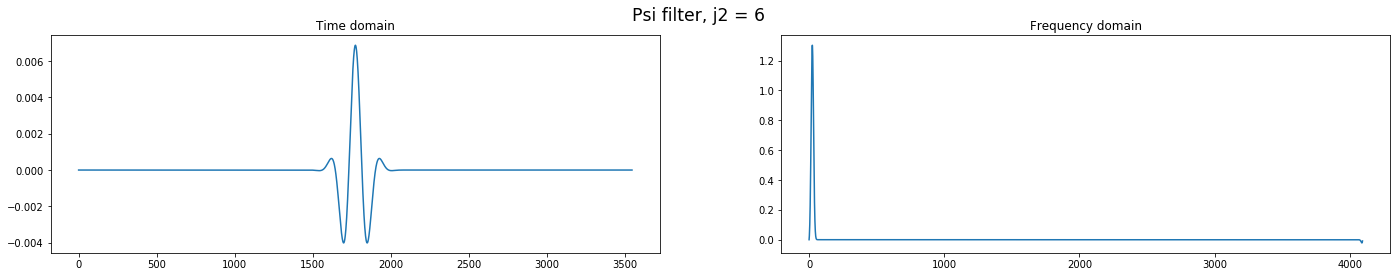

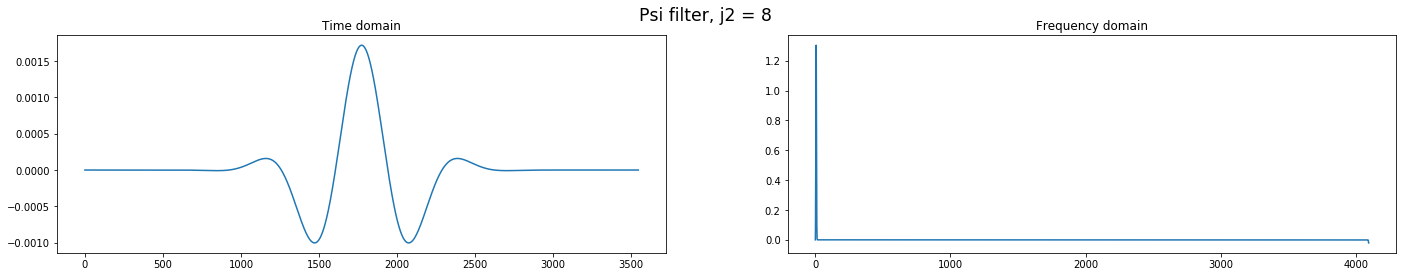

In [11]:
plot_filters(bank, filt_opt_bank)